# Linear Regression - Assignment

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [262]:
car_price = pd.read_csv('CarPrice_Assignment.csv')

# We will be following the below mentioned steps while creating our model

    - Reading and understanding the data
    - Preparing the data for test train split
    - Training the model
    - Residual analysis
    - Prediction and evaluations on the test set

## Step1: Reading and Understanding the data

In [263]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [264]:
#Check if any of the columns have null values and the data types of each of the columns
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [265]:
#Converting categorical columns to object type

object = ['symboling','car_ID']

car_price[object] = car_price[object].astype(str)

car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null object
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm    

In [266]:
# Splitting the car name to get brand val

name = car_price['CarName'].str.split(' ',expand = True)

car_price['Brand_name'] = name[0]

car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


#### We also notice that none of the records are empty and hence no imputation is required

### Visualising the Data

Checking the correlation between all the numerical variables so that the ones with low correlation can be removed

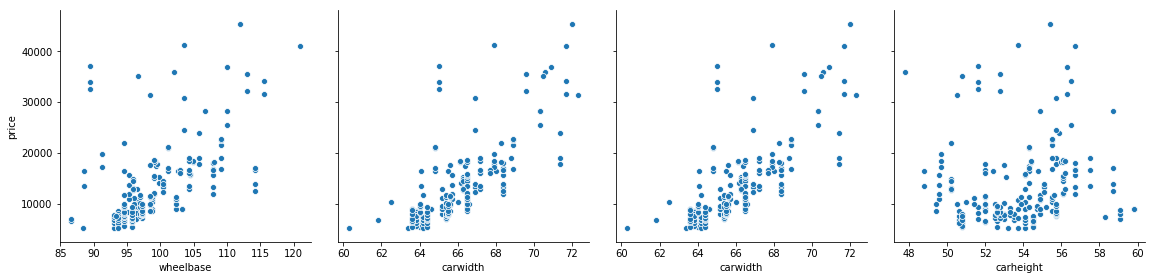

In [267]:
sns.pairplot(data = car_price,height = 4, x_vars=['wheelbase','carwidth','carwidth','carheight'],y_vars = ['price'])

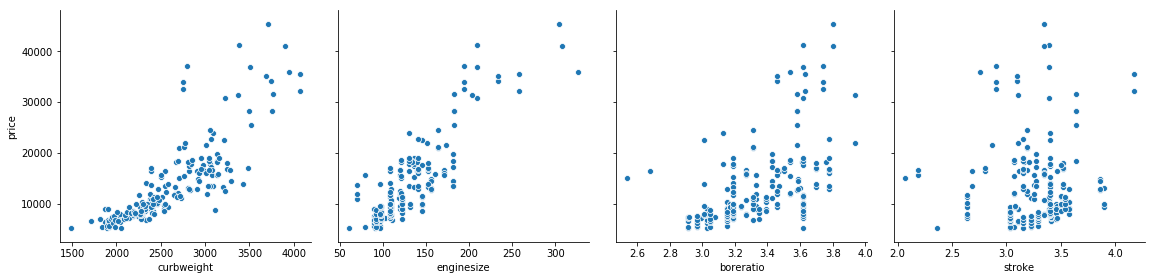

In [268]:
sns.pairplot(data = car_price,height = 4, x_vars=['curbweight','enginesize','boreratio','stroke'],y_vars = ['price'])

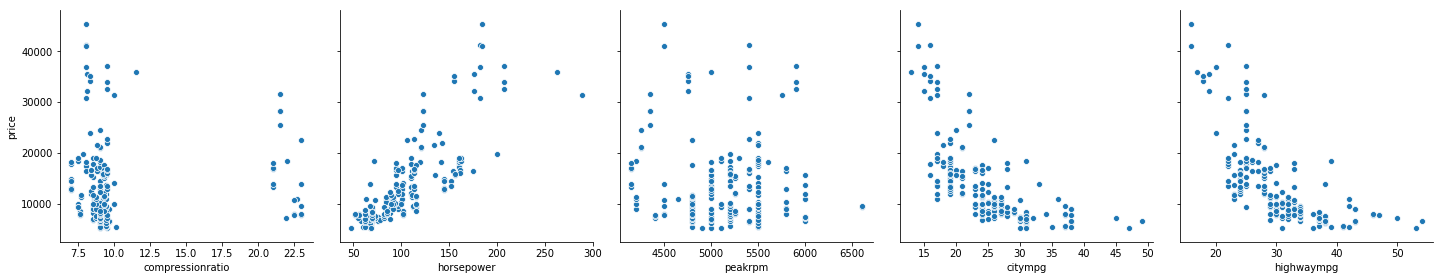

In [269]:
sns.pairplot(data = car_price,height = 4, x_vars=['compressionratio','horsepower','peakrpm','citympg','highwaympg'],y_vars = ['price'])

### Looking at the above scatter plots we can say that a linear regression model is plausible since at least some of the indepent variables seem to correlated with our predictor variable 'Price'


### Now that we know some numerical columns are showing a relationship with price, lets have a correlation matrix to try and figure out which columns are definitely not related with price

In [270]:
corr = car_price.corr()

corr.style.background_gradient(cmap= sns.diverging_palette(220, 10, as_cmap=True))

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.68292
carwidth,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.55915,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.171071,-0.0553067,0.261214,-0.108802,-0.320411,-0.0486396,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.64848,0.16879,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.583774,0.203129,0.0289714,0.809769,-0.24466,-0.653658,-0.67747,0.874145
boreratio,0.48875,0.606454,0.55915,0.171071,0.64848,0.583774,1,-0.055909,0.00519734,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.0553067,0.16879,0.203129,-0.055909,1,0.18611,0.0809395,-0.0679638,-0.0421448,-0.0439309,0.0794431
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.0289714,0.00519734,0.18611,1,-0.204326,-0.435741,0.324701,0.265201,0.0679835
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.0809395,-0.204326,1,0.131073,-0.801456,-0.770544,0.808139


### From the above correlation matrix we can observe that certain variables have very less relation with price

### Hence the following columns (having correlation less than +- 15% will be dropped:

    - Car Height
    - Compression Ratio
    - Stroke
    - Peak RPM

In [271]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null object
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm    

In [272]:
car_price.groupby('Brand_name').size()

Brand_name
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
dtype: int64

### We notice that certain companies have duplicated names and hence the names have to be corrected in order for us to proceed with the analysis

In [273]:
car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'volkswagen' if x == ['vokswagen'] else x )

In [274]:
car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'toyota' if x == 'toyouta' else x )

car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'volkswagen' if x == 'vw' else x )

car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'porsche' if x == 'porcshce' else x )

car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'mazda' if x == 'maxda' else x )

car_price['Brand_name'] = car_price['Brand_name'].apply(lambda x: 'nissan' if x == 'Nissan' else x )

car_price.groupby('Brand_name').size()

Brand_name
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
vokswagen       1
volkswagen     11
volvo          11
dtype: int64

### Next we will take a look at the categorical variable and see if they make sense as well

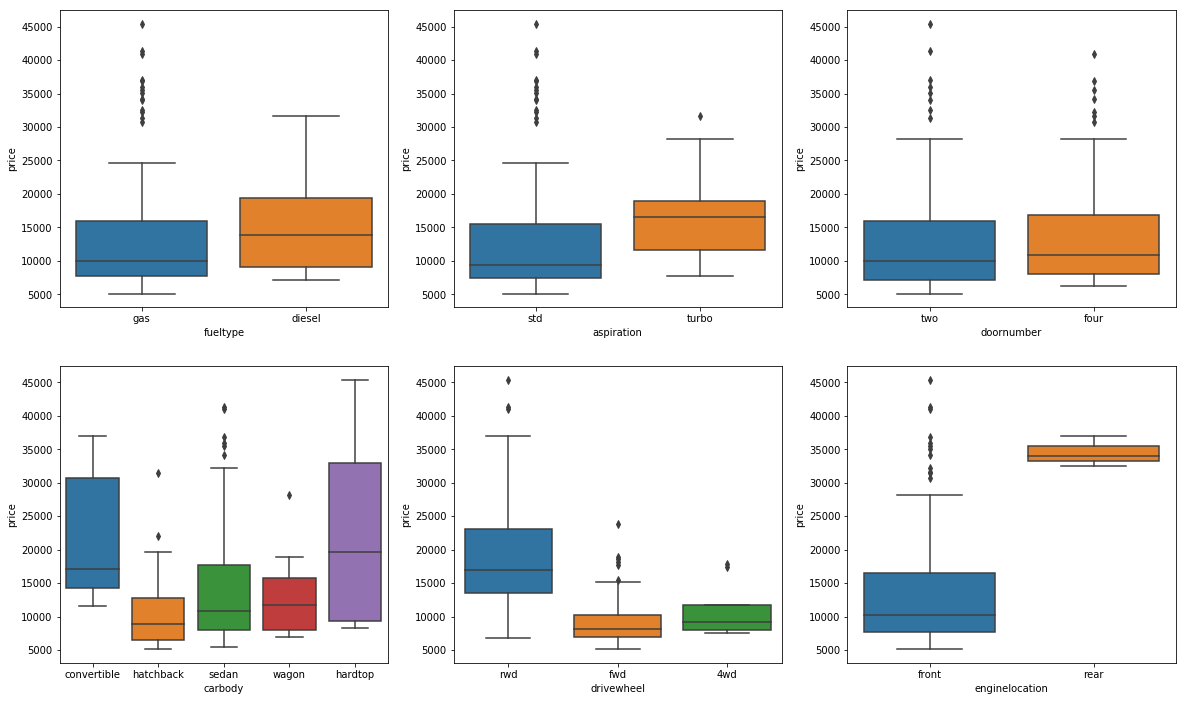

In [275]:
plt.figure(figsize =(20,12))

plt.subplot(2,3,1)

sns.boxplot(x ='fueltype',y = 'price',data = car_price)

plt.subplot(2,3,2)

sns.boxplot(x ='aspiration',y='price',data = car_price)

plt.subplot(2,3,3)

sns.boxplot(x ='doornumber',y='price',data = car_price)

plt.subplot(2,3,4)

sns.boxplot(x = 'carbody',y='price',data = car_price)

plt.subplot(2,3,5)

sns.boxplot(x = 'drivewheel',y='price',data = car_price)

plt.subplot(2,3,6)

sns.boxplot(x = 'enginelocation',y='price',data = car_price)

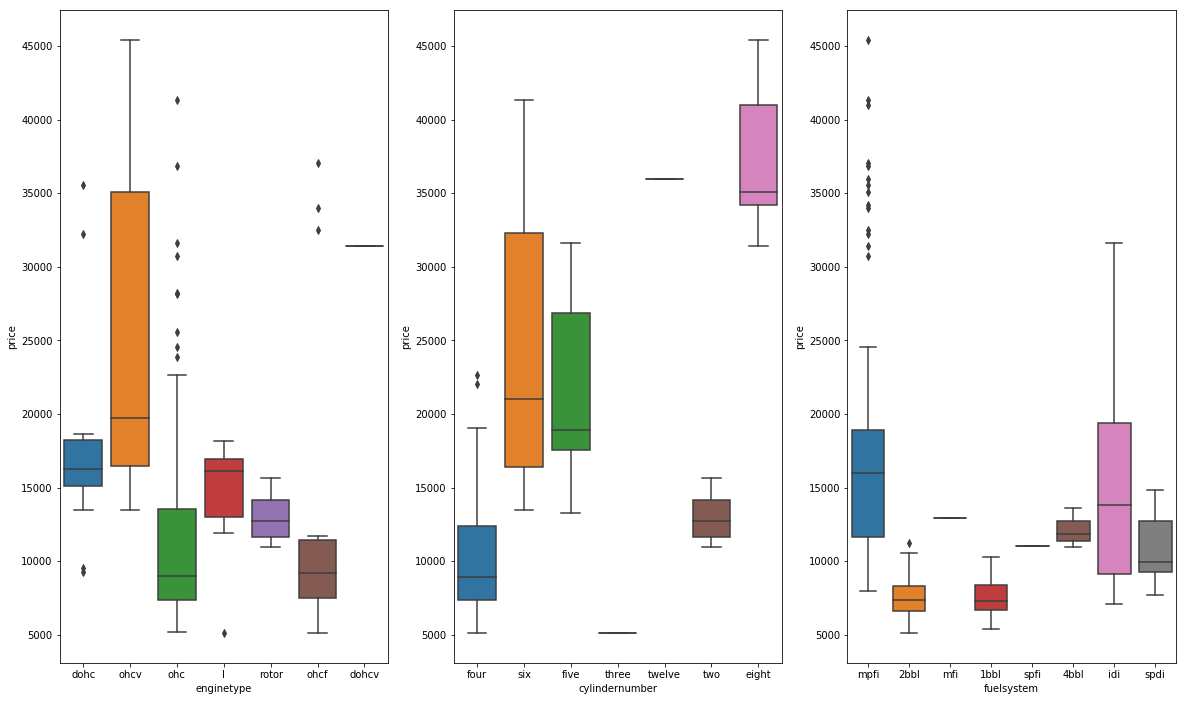

In [276]:
plt.figure(figsize =(20,12))

plt.subplot(1,3,1)

sns.boxplot(x = 'enginetype',y='price',data = car_price)

plt.subplot(1,3,2)

sns.boxplot(x = 'cylindernumber',y='price',data = car_price)

plt.subplot(1,3,3)

sns.boxplot(x = 'fuelsystem',y='price',data = car_price)

### From the above box plots we observe that there are some level of relation even between the categorical data and price and hence linear regression would be the right way to go about explaining the relationship between these metrics

## Step 2: Preparing the data for test train split

### We would be dummy encoding the non-ordered categorical variables which are the following -

    - Fuel Type
    - Aspiration
    - carbody
    - drivewheel
    - enginelocation

In [277]:
# def map(x):
#     return x.map({'gas':1,'diesel':0})

car_price['fuel_type'] = car_price['fueltype'].apply(lambda x: 1 if x =='gas' else '0')

car_price['aspiration_type'] = car_price['aspiration'].apply(lambda x: 1 if x =='std' else '0')

car_price['enginelocation_type'] = car_price['enginelocation'].apply(lambda x: 1 if x =='front' else '0')

car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_name,fuel_type,aspiration_type,enginelocation_type
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.00,111,5000,21,27,13495.000,alfa-romero,1,1,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.00,111,5000,21,27,16500.000,alfa-romero,1,1,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.00,154,5000,19,26,16500.000,alfa-romero,1,1,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.00,102,5500,24,30,13950.000,audi,1,1,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,8.00,115,5500,18,22,17450.000,audi,1,1,1
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,8.50,110,5500,19,25,15250.000,audi,1,1,1
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,8.50,110,5500,19,25,17710.000,audi,1,1,1
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,8.50,110,5500,19,25,18920.000,audi,1,1,1
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,8.30,140,5500,17,20,23875.000,audi,1,0,1
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,7.00,160,5500,16,22,17859.167,audi,1,0,1


In [278]:
status_drivewheel = pd.get_dummies(car_price['drivewheel'], drop_first = True)

status_drivewheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


### Since we require only 2 columns (n-1) vairables are required. So the following terminology will be followed -

    - 00 will refer to 4WD
    - 01 will refer to RWD
    - 10 will refer to FWD

In [279]:
car_price = pd.concat([car_price,status_drivewheel],axis=1)

car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,Brand_name,fuel_type,aspiration_type,enginelocation_type,fwd,rwd
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495.000,alfa-romero,1,1,1,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500.000,alfa-romero,1,1,1,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500.000,alfa-romero,1,1,1,0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,5500,24,30,13950.000,audi,1,1,1,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,5500,18,22,17450.000,audi,1,1,1,0,0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,5500,19,25,15250.000,audi,1,1,1,1,0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,5500,19,25,17710.000,audi,1,1,1,1,0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,5500,19,25,18920.000,audi,1,1,1,1,0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,5500,17,20,23875.000,audi,1,0,1,1,0
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,5500,16,22,17859.167,audi,1,0,1,0,0


In [280]:
status_carbody = pd.get_dummies(car_price['carbody'], drop_first = True)

car_price = pd.concat([car_price,status_carbody],axis=1)

car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,Brand_name,fuel_type,aspiration_type,enginelocation_type,fwd,rwd,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,alfa-romero,1,1,1,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,alfa-romero,1,1,1,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,alfa-romero,1,1,1,0,1,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,audi,1,1,1,1,0,0,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,audi,1,1,1,0,0,0,0,1,0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,audi,1,1,1,1,0,0,0,1,0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,audi,1,1,1,1,0,0,0,1,0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,audi,1,1,1,1,0,0,0,0,1
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,audi,1,0,1,1,0,0,0,1,0
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,audi,1,0,1,0,0,0,1,0,0


In [281]:
car_price.drop(['carbody','drivewheel'],axis=1,inplace = True)

In [282]:
car_price.drop(['fueltype','aspiration','enginelocation','CarName'],axis =1,inplace = True)

In [283]:
status_fuelsystem = pd.get_dummies(car_price['fuelsystem'], drop_first = True)

status_fuelsystem.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


#### The following sequence will indicate the presence of 1bbl - 0000000

In [284]:
car_price = pd.concat([car_price,status_fuelsystem],axis=1)

car_price['door_number'] = car_price['doornumber'].apply(lambda x: 2 if x =='two' else 4)

car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
car_ID                 205 non-null object
symboling              205 non-null object
doornumber             205 non-null object
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginetype             205 non-null object
cylindernumber         205 non-null object
enginesize             205 non-null int64
fuelsystem             205 non-null object
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
Brand_name             205 non-nu

In [285]:
status_enginetype = pd.get_dummies(car_price['enginetype'], drop_first = True)

status_enginetype.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


#### the following sequence will indicate the presence of dohc - 000000

In [286]:
car_price = pd.concat([car_price,status_enginetype],axis=1)

In [287]:
car_price['cylinder_number'] = car_price['cylindernumber'].apply(lambda x: 2 if x =='two' else 3 if x=='three' else 4 
                                                                  if x=='four' else 5 if x=='five' else 6 if x=='six' else 7)

car_price['symbol'] = car_price['symboling'].apply(lambda x: 'sym_three' if x=='3' else 'sym_two' if x=='2' else 'sym_one' if x=='1' else 'sym_zero' 
                                                   if x=='0' else 'sym_negative_one' if x=='-1' else 'sym_negative_two')

status_symbol = pd.get_dummies(car_price['symbol'],drop_first = True)

car_price = pd.concat([car_price,status_symbol],axis=1)


In [288]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
car_ID                 205 non-null object
symboling              205 non-null object
doornumber             205 non-null object
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginetype             205 non-null object
cylindernumber         205 non-null object
enginesize             205 non-null int64
fuelsystem             205 non-null object
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
Brand_name             205 non-nu

In [289]:
car_price.drop(['symboling','doornumber','cylindernumber'],axis =1,inplace = True)

In [290]:
car_price.drop(['enginetype','fuelsystem','symbol'],axis=1,inplace = True)

In [291]:
car_price['fuel_type'] = pd.to_numeric(car_price['fuel_type'])

car_price['aspiration_type'] = pd.to_numeric(car_price['aspiration_type'])

car_price['enginelocation_type'] = pd.to_numeric(car_price['enginelocation_type'])


In [292]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
car_ID                 205 non-null object
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
Brand_name             205 non-null object
fuel_type              205 non-null int64
aspiration_type        205 non-null int64
enginelocation_type    205 non-null int64
fwd                    205 non-null uint8
rwd                    205 non-null u

In [293]:
status_brandname = pd.get_dummies(car_price['Brand_name'])

status_brandname.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
car_price = pd.concat([car_price,status_brandname],axis=1)

car_price.drop(['car_ID'],axis =1, inplace = True)

In [295]:
car_price.drop(['Brand_name'],axis=1,inplace = True)

In [296]:
car_price.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data into test and train

In [297]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train,df_test = train_test_split(car_price,train_size = 0.7,test_size = 0.3,random_state = 100)

df_test.shape

(62, 66)

In [298]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
            'peakrpm','citympg','highwaympg','cylinder_number','door_number']

In [299]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [300]:
df_train[num_vars].describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,cylinder_number,door_number
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.469930,0.559441
std,0.215682,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.184251,0.498199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.400000,0.000000
50%,0.140343,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.400000,1.000000
75%,0.313479,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.400000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the model into X and Y sets for building our model

In [301]:
y_train = df_train.pop('price')
X_train = df_train

In [302]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 65 columns):
wheelbase              143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
carheight              143 non-null float64
curbweight             143 non-null float64
enginesize             143 non-null float64
boreratio              143 non-null float64
stroke                 143 non-null float64
compressionratio       143 non-null float64
horsepower             143 non-null float64
peakrpm                143 non-null float64
citympg                143 non-null float64
highwaympg             143 non-null float64
fuel_type              143 non-null int64
aspiration_type        143 non-null int64
enginelocation_type    143 non-null int64
fwd                    143 non-null uint8
rwd                    143 non-null uint8
hardtop                143 non-null uint8
hatchback              143 non-null uint8
sedan                  143 no

### Using RFE to filter down on the number of feature variables to be selected

In [303]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [304]:
# Running RFE with the output number of variable fixed to 20
lm = LinearRegression()

lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)


In [305]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', False, 7),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 17),
 ('compressionratio', True, 1),
 ('horsepower', False, 15),
 ('peakrpm', False, 2),
 ('citympg', False, 35),
 ('highwaympg', False, 3),
 ('fuel_type', True, 1),
 ('aspiration_type', False, 22),
 ('enginelocation_type', True, 1),
 ('fwd', False, 41),
 ('rwd', False, 27),
 ('hardtop', False, 10),
 ('hatchback', False, 9),
 ('sedan', False, 11),
 ('wagon', False, 12),
 ('2bbl', False, 25),
 ('4bbl', False, 19),
 ('idi', True, 1),
 ('mfi', False, 37),
 ('mpfi', False, 39),
 ('spdi', False, 42),
 ('spfi', False, 44),
 ('door_number', False, 36),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 24),
 ('ohcf', True, 1),
 ('ohcv', False, 23),
 ('rotor', False, 18),
 ('cylinder_number', True, 1),
 ('sym_negative_two', True, 1),
 ('sym_one', False, 43),
 ('sym_three', False, 28),
 ('sym_two

In [306]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'compressionratio', 'fuel_type', 'enginelocation_type', 'idi', 'dohcv',
       'ohcf', 'cylinder_number', 'sym_negative_two', 'bmw', 'buick',
       'mitsubishi', 'porsche', 'renault', 'saab', 'volvo'],
      dtype='object')

### Build model using statsmodel to look more into detail

In [307]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [308]:
X_train_rfe.head()

,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,fuel_type,enginelocation_type,idi,dohcv,ohcf,cylinder_number,sym_negative_two,bmw,buick,mitsubishi,porsche,renault,saab,volvo
122,0.291667,0.265487,0.272692,0.139623,0.230159,0.15000,1,1,0,0,0,0.4,0,0,0,0,0,0,0,0
125,0.666667,0.212389,0.500388,0.339623,1.000000,0.15625,1,1,0,0,0,0.4,0,0,0,0,1,0,0,0
166,0.308333,0.424779,0.314973,0.139623,0.444444,0.15000,1,1,0,0,0,0.4,0,0,0,0,0,0,0,0
1,0.316667,0.088496,0.411171,0.260377,0.626984,0.12500,1,1,0,0,0,0.4,0,0,0,0,0,0,0,0
199,0.575000,0.858407,0.647401,0.260377,0.746032,0.03125,1,1,0,0,0,0.4,0,0,0,0,0,0,0,1


In [309]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

In [310]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.41e-68
Time:                        17:38:38   Log-Likelihood:                 225.89
No. Observations:                 143   AIC:                            -411.8
Df Residuals:                     123   BIC:                            -352.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3593    

### Remove compressionratio since the p value is higher compared to others and then run the model

In [311]:
X_train_1 = X_train_rfe.drop(["compressionratio"], axis = 1)

In [312]:
# Rebuilding the model without compression ratio

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_1)

lm = sm.OLS(y_train,X_train_lm).fit()

In [313]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.37e-69
Time:                        17:38:38   Log-Likelihood:                 224.01
No. Observations:                 143   AIC:                            -410.0
Df Residuals:                     124   BIC:                            -353.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2641    

### We will also check the VIF value of these columns so that we can avoid multicollinearity

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,fuel_type,inf
8,idi,inf
4,enginesize,17.920000
3,curbweight,9.910000
11,cylinder_number,9.700000
5,boreratio,7.300000
1,carwidth,5.250000
16,porsche,3.630000
10,ohcf,2.680000
7,enginelocation_type,2.400000


### Removing dohcv as it gives infinite VIF and then running the model again

In [315]:
X_train_2 = X_train_1.drop(["fuel_type"], axis = 1)

# Rebuilding the model without compression ratio

import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_2)

lm = sm.OLS(y_train,X_train_lm2).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.37e-69
Time:                        17:38:38   Log-Likelihood:                 224.01
No. Observations:                 143   AIC:                            -410.0
Df Residuals:                     124   BIC:                            -353.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4060    

### Checking for VIF again

In [316]:
X_train_lm2 = X_train_lm2.drop(['const'],axis=1)

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylinder_number,69.80
3,enginesize,61.57
5,enginelocation_type,50.85
4,boreratio,49.60
2,curbweight,47.11
0,carwidth,38.16
1,carheight,11.65
8,ohcf,2.89
14,porsche,2.32
17,volvo,1.91


### Removing Cylinder number as it shows high VIF

In [318]:
X_train_3 = X_train_2.drop(["idi"], axis = 1)

# Rebuilding the model without idi

import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_3)

lm = sm.OLS(y_train,X_train_lm3).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.82e-70
Time:                        17:38:39   Log-Likelihood:                 223.36
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                     125   BIC:                            -357.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4009    

### Checking VIF again

In [319]:
X_train_lm3 = X_train_lm3.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylinder_number,68.01
3,enginesize,61.34
5,enginelocation_type,50.85
4,boreratio,49.54
2,curbweight,46.86
0,carwidth,38.12
1,carheight,10.93
7,ohcf,2.88
13,porsche,2.32
16,volvo,1.90


### Removing Curbweight as it shows high VIF

In [320]:
X_train_4 = X_train_3.drop(["dohcv"], axis = 1)

# Rebuilding the model without dohcv

import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_4)

lm = sm.OLS(y_train,X_train_lm4).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     130.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.52e-70
Time:                        17:38:39   Log-Likelihood:                 221.71
No. Observations:                 143   AIC:                            -409.4
Df Residuals:                     126   BIC:                            -359.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3274    

### Checking For VIF without dhocv

In [321]:
X_train_lm4 = X_train_lm4.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylinder_number,63.84
3,enginesize,57.81
5,enginelocation_type,48.70
4,boreratio,48.06
2,curbweight,46.79
0,carwidth,36.78
1,carheight,10.55
6,ohcf,2.75
12,porsche,2.06
15,volvo,1.88


### Removing cylinder number as it shows high VIF

In [322]:
X_train_5 = X_train_4.drop(["cylinder_number"], axis = 1)

# Rebuilding the model without curb weight

import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_5)

lm = sm.OLS(y_train,X_train_lm5).fit()

print(lm.summary())

X_train_lm5 = X_train_lm5.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.36e-67
Time:                        17:38:39   Log-Likelihood:                 211.52
No. Observations:                 143   AIC:                            -391.0
Df Residuals:                     127   BIC:                            -343.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3063    

### Removing OHCF as it shows high p value

In [323]:
X_train_6 = X_train_5.drop(["ohcf"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_6)

lm = sm.OLS(y_train,X_train_lm6).fit()

print(lm.summary())

X_train_lm6 = X_train_lm6.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     129.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.06e-68
Time:                        17:38:39   Log-Likelihood:                 211.50
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     128   BIC:                            -348.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3021    

### Removing Curb Weight as it shows high VIF

In [324]:
X_train_7 = X_train_6.drop(["curbweight"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_7)

lm = sm.OLS(y_train,X_train_lm7).fit()

print(lm.summary())

X_train_lm7 = X_train_lm7.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.09e-62
Time:                        17:38:39   Log-Likelihood:                 193.28
No. Observations:                 143   AIC:                            -358.6
Df Residuals:                     129   BIC:                            -317.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2836    

### Removing Boreratio as it has both high VIF and high p value

In [325]:
X_train_8 = X_train_7.drop(["boreratio"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm8 = sm.add_constant(X_train_8)

lm = sm.OLS(y_train,X_train_lm8).fit()

print(lm.summary())

X_train_lm8 = X_train_lm8.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.01e-63
Time:                        17:38:39   Log-Likelihood:                 192.76
No. Observations:                 143   AIC:                            -359.5
Df Residuals:                     130   BIC:                            -321.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2777    

### Removing Porche as it has high p value

In [326]:
X_train_9 = X_train_8.drop(["porsche"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm9 = sm.add_constant(X_train_9)

lm = sm.OLS(y_train,X_train_lm9).fit()

print(lm.summary())

X_train_lm9 = X_train_lm9.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.53e-64
Time:                        17:38:39   Log-Likelihood:                 191.33
No. Observations:                 143   AIC:                            -358.7
Df Residuals:                     131   BIC:                            -323.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3582    

### Removing car width as it has hig VIF

In [327]:
X_train_10 = X_train_9.drop(["carwidth"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm10 = sm.add_constant(X_train_10)

lm = sm.OLS(y_train,X_train_lm10).fit()

print(lm.summary())

X_train_lm10 = X_train_lm10.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     78.32
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.56e-50
Time:                        17:38:39   Log-Likelihood:                 155.40
No. Observations:                 143   AIC:                            -288.8
Df Residuals:                     132   BIC:                            -256.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3146    

### Removing Car hieght as it has high p and high VIF value

In [328]:
X_train_11 = X_train_10.drop(["carheight"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm11 = sm.add_constant(X_train_11)

lm = sm.OLS(y_train,X_train_lm11).fit()

print(lm.summary())

X_train_lm11 = X_train_lm11.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     86.49
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.49e-51
Time:                        17:38:39   Log-Likelihood:                 154.56
No. Observations:                 143   AIC:                            -289.1
Df Residuals:                     133   BIC:                            -259.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2962    

### Removing Mitsubuishi as it has high p value

In [329]:
X_train_12 = X_train_11.drop(["mitsubishi"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm12 = sm.add_constant(X_train_12)

lm = sm.OLS(y_train,X_train_lm12).fit()

print(lm.summary())

X_train_lm12 = X_train_lm12.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     94.35
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.98e-51
Time:                        17:38:39   Log-Likelihood:                 152.23
No. Observations:                 143   AIC:                            -286.5
Df Residuals:                     134   BIC:                            -259.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2961    

### Removing renault as it has high p value

In [330]:
X_train_13 = X_train_12.drop(["renault"], axis = 1)

# Rebuilding the model without ohcf

import statsmodels.api as sm  
X_train_lm13 = sm.add_constant(X_train_13)

lm = sm.OLS(y_train,X_train_lm13).fit()

print(lm.summary())

X_train_lm13 = X_train_lm13.drop(['const'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.27e-52
Time:                        17:38:39   Log-Likelihood:                 150.93
No. Observations:                 143   AIC:                            -285.9
Df Residuals:                     135   BIC:                            -262.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2980    

## Residual Analysis

Text(0.5, 0, 'Errors')

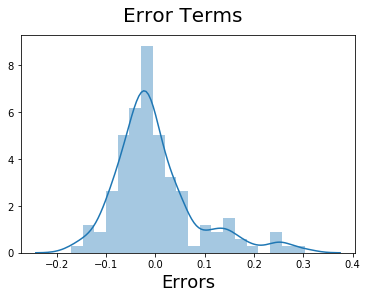

In [331]:
y_train_price = lm.predict(X_train_13)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        # X-label

### From the residual analysis we observe that the errors are normally distributed (which is a key assumption) around the mean 0

In [332]:
num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
            'peakrpm','citympg','highwaympg','cylinder_number','door_number']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.016129,0.064516,0.080645
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.127000,0.247676,0.274512
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
y_test = df_test.pop('price')
X_test = df_test

In [334]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)

### Only selecting the variables for which we have a coefficient in the final model

In [335]:
X_test_m2 = X_test_m1[['enginesize','enginelocation_type','volvo','sym_negative_two','buick','bmw','saab']]

In [336]:
X_test_m3 = sm.add_constant(X_test_m2)

X_test_m3.head()

,const,enginesize,enginelocation_type,volvo,sym_negative_two,buick,bmw,saab
160,1.0,0.139623,1,0,0,0,0,0
186,1.0,0.181132,1,0,0,0,0,0
59,1.0,0.230189,1,0,0,0,0,0
165,1.0,0.139623,1,0,0,0,0,0
140,1.0,0.177358,1,0,0,0,0,0


In [337]:
y_pred_m3 = lm.predict(X_test_m3)

In [338]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred =y_pred_m3)

0.8244310364352304

### The final R2 value between y test and y pred is 82.4%. This is a stable model as we see around 85% when running the model on the train data set

# Conclusion

## Some of the key variables on which the price depends are -

    - Engine size
    - Engine location
    - Brand name such as volvo, buick, bmw and saab make an impact on the price
    - The insurance rating of the car 

## Some of the other inferences that can be drawm based on EDA and feature variables are as follows -


### We see a positive corelation with engine size, which essentially means that the bigger the engine size is, the costlier the car would be
-
### We also note that correlation coefficient for engine location is negative. This means that the price of car goes up whhen the engine location is 'rear' as compared to 'front'. This is also validated in the box plots plotted above which shows that rear enginer cars are priced higher than front engine cars